In [44]:
# import all the necessary modules and packages required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Upload the necessary dataset required
df=pd.read_csv('/kaggle/input/titanic/titanic.csv')

In [46]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [47]:
# This is the dimensions of the given dataset
df.shape

(418, 12)

In [48]:
#These are the differentl kinds of columns present in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
# Finding the number of missing values present before EDA
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

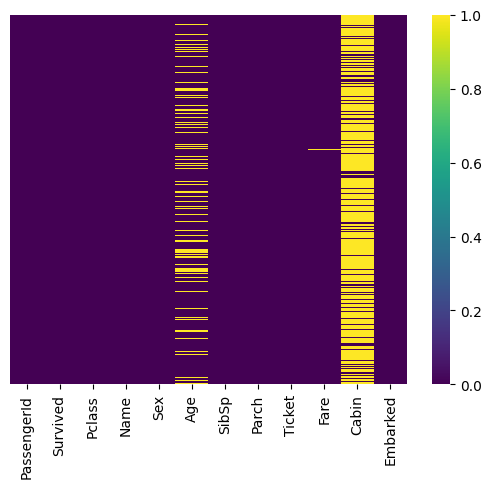

In [52]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

In [53]:
df.values

array([[892, 0, 3, ..., 7.8292, nan, 'Q'],
       [893, 1, 3, ..., 7.0, nan, 'S'],
       [894, 0, 2, ..., 9.6875, nan, 'Q'],
       ...,
       [1307, 0, 3, ..., 7.25, nan, 'S'],
       [1308, 0, 3, ..., 8.05, nan, 'S'],
       [1309, 0, 3, ..., 22.3583, nan, 'C']], dtype=object)

In [54]:
# Replacing null values with either mean,median or frequently repeated(mode value) for catogerical column

meanval=df['Fare'].mean()
df['Fare'].fillna(meanval,inplace=True)
df['Cabin'].fillna('unknown',inplace=True)

In [55]:
meanage=df['Age'].mean()
df['Age'].fillna(meanage,inplace=True)

<Axes: >

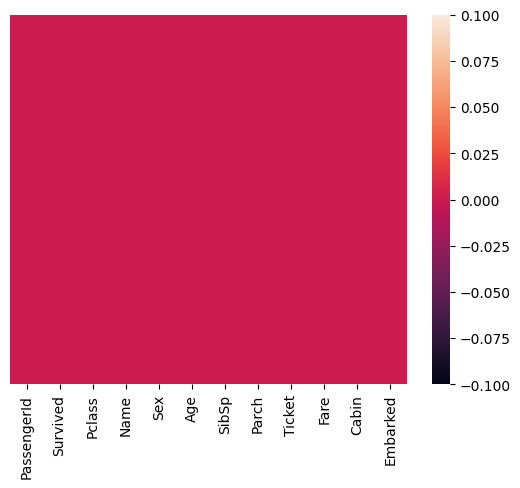

In [56]:
sns.heatmap(df.isnull(),yticklabels=False)

In [57]:
# Analysis between Survival v/s Sex
Gender_detail=df.groupby(['Survived','Sex']).size()
print(Gender_detail)

Survived  Sex   
0         male      266
1         female    152
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

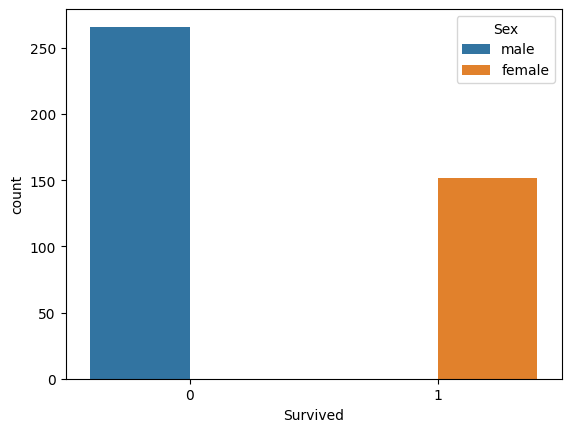

In [58]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [59]:
# Analysis of Survival v/s Age
age_detail=df.groupby(['Survived','Age']).size()
print(age_detail)

Survived  Age  
0         0.33     1
          0.75     1
          0.83     1
          2.00     1
          5.00     1
                  ..
1         59.00    1
          60.00    3
          63.00    1
          64.00    2
          76.00    1
Length: 117, dtype: int64


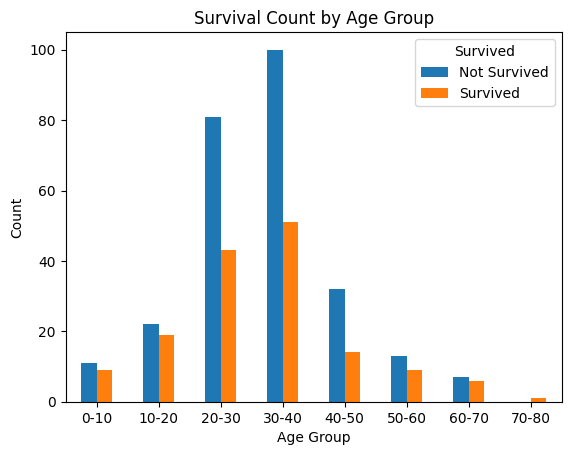

In [60]:
# Here as the age is varied randomly across vast region it would be beneficial if we consider bins of each length 10 so then it would be clearer.
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60','60-70','70-80']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_counts=df.groupby(['age_group','Survived']).size().unstack(fill_value=0)
age_counts.plot(kind='bar',stacked=False,rot=0)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])


In [61]:
# Analysis between Survival v/s Pclass groups
pclass_detail=df.groupby(['Survived','Pclass']).size()
print(pclass_detail)

Survived  Pclass
0         1          57
          2          63
          3         146
1         1          50
          2          30
          3          72
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

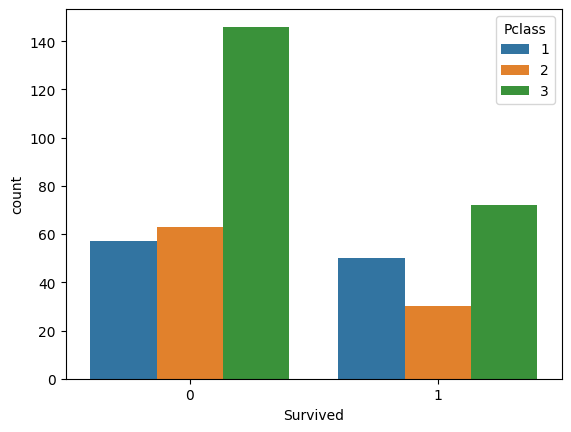

In [62]:
sns.countplot(x='Survived',hue='Pclass',data=df)

In [63]:
# Analysis of Survival class v/s Cabin Status
# This also includes whether cabin provided as 'yes','no' or 'unknown'
df['cabin_status']=np.where(df['Cabin']=='Yes','No','Unknown ')
print(df['cabin_status'])

0      Unknown 
1      Unknown 
2      Unknown 
3      Unknown 
4      Unknown 
         ...   
413    Unknown 
414    Unknown 
415    Unknown 
416    Unknown 
417    Unknown 
Name: cabin_status, Length: 418, dtype: object


In [64]:
cabin_detail=df.groupby(['Survived','cabin_status']).size()
print(cabin_detail)

Survived  cabin_status
0         Unknown         266
1         Unknown         152
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

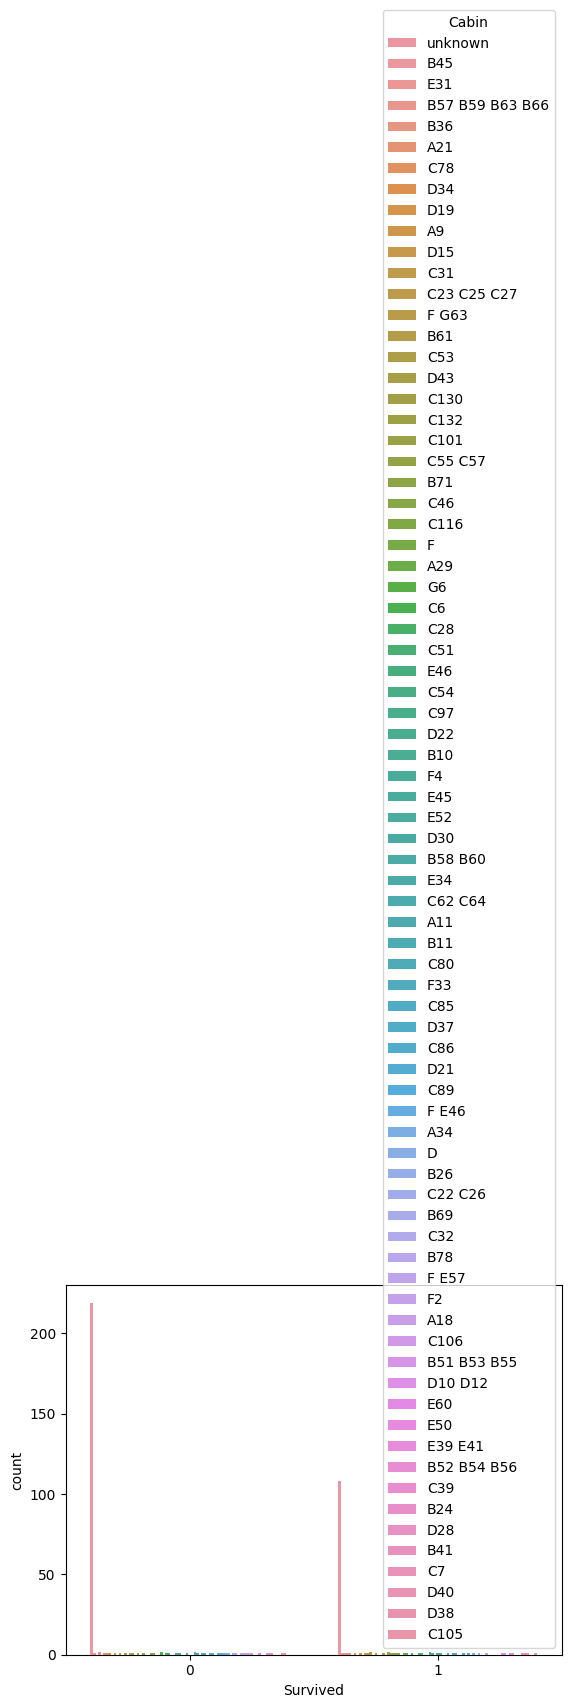

In [68]:
sns.countplot(x='Survived',hue='Cabin',data=df)